# Limipieza

In [9]:
# imports
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# training df 
df_train = pd.read_csv('../../data/raw/customer_churn_dataset-training-master.csv')

#test df 
df_test = pd.read_csv('../../data/raw/customer_churn_dataset-testing-master.csv')

In [3]:
# drop nulls
df_train.dropna(axis=0, inplace=True)
# dtypes to int
df_train = df_train.astype({'CustomerID':'int', 'Age': 'int', 'Tenure':'int', 'Usage Frequency':'int', 'Support Calls':'int', 'Total Spend':'int', 'Last Interaction':'int',  'Churn':'int'})
# remove index (ID col)
df_train.drop(columns='CustomerID', inplace=True)
#columns to numeric
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female':0});
df_train['Subscription Type'] = df_train['Subscription Type'].map({'Basic':1, 'Standard':2,'Premium': 3})
df_train['Contract Length'] = df_train['Contract Length'].map({'Monthly':1, 'Quarterly':3,'Annual':12 })
#reorder cols 
columns = [col for col in df_train.columns if col != 'Churn'] + ['Churn']
df_train = df_train[columns]
#normalise column names 
df_train.rename(columns={'Age': 'age' , 'Gender': 'gender', 'Tenure': 'tenure', 'Usage Frequency': 'usage_frequency', 
                 'Support Calls':'support_calls', 'Payment Delay': 'payment_delay', 'Contract Length': 'contract_length', 
                 'Total Spend':'total_spend', 'Last Interaction': 'last_interaction', 'Subscription Type': 'subscription_type',
                 'Churn':'churn'}, inplace=True)

In [5]:
# preview: .head()
df_train.head(5)

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,30,0,39,14,5,18.0,2,12,932,17,1
1,65,0,49,1,10,8.0,1,1,557,6,1
2,55,0,14,4,6,18.0,1,3,185,3,1
3,58,1,38,21,7,7.0,2,1,396,29,1
4,23,1,32,20,5,8.0,1,1,617,20,1


In [6]:
df_train['churn'].value_counts(normalize=True)

churn
1    0.567107
0    0.432893
Name: proportion, dtype: float64

In [4]:
# drop nulls
df_test.dropna(axis=0, inplace=True)
# remove index (ID col)
df_test.drop(columns='CustomerID', inplace=True)
# dtypes to int
df_test = df_test.astype({'Age': 'int', 'Tenure':'int', 'Usage Frequency':'int', 'Support Calls':'int', 'Total Spend':'int', 'Last Interaction':'int',  'Churn':'int'})
#columns to numeric
df_test['Gender'] = df_test['Gender'].map({'Male': 1, 'Female':0});
df_test['Subscription Type'] = df_test['Subscription Type'].map({'Basic':1, 'Standard':2,'Premium': 3})
df_test['Contract Length'] = df_test['Contract Length'].map({'Monthly':1, 'Quarterly':3,'Annual':12 })
#reorder cols 
columns = [col for col in df_test.columns if col != 'Churn'] + ['Churn']
df_test = df_test[columns]
df_test.rename(columns={'Age': 'age', 'Gender' : 'gender', 'Tenure' : 'tenure', 'Usage Frequency' : 'usage_frequency', 
                        'Support Calls':'support_calls',
                        'Payment Delay': 'payment_delay', 'Subscription Type': 'subscription_type', 
                        'Contract Length':'contract_length', 'Total Spend':'total_spend',
                        'Last Interaction':'last_interaction', 'Churn':'churn'}, inplace=True)

In [7]:
# preview: .head()
df_test.head(5)

,age,gender,tenure,usage_frequency,support_calls,payment_delay,subscription_type,contract_length,total_spend,last_interaction,churn
0,22,0,25,14,4,27,1,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,3,12,757,21,0
3,35,1,9,12,5,17,3,3,232,18,0
4,53,0,58,24,9,2,2,12,533,18,0


In [8]:
df_test['churn'].value_counts(normalize=True)

churn
0    0.526315
1    0.473685
Name: proportion, dtype: float64

<Axes: >

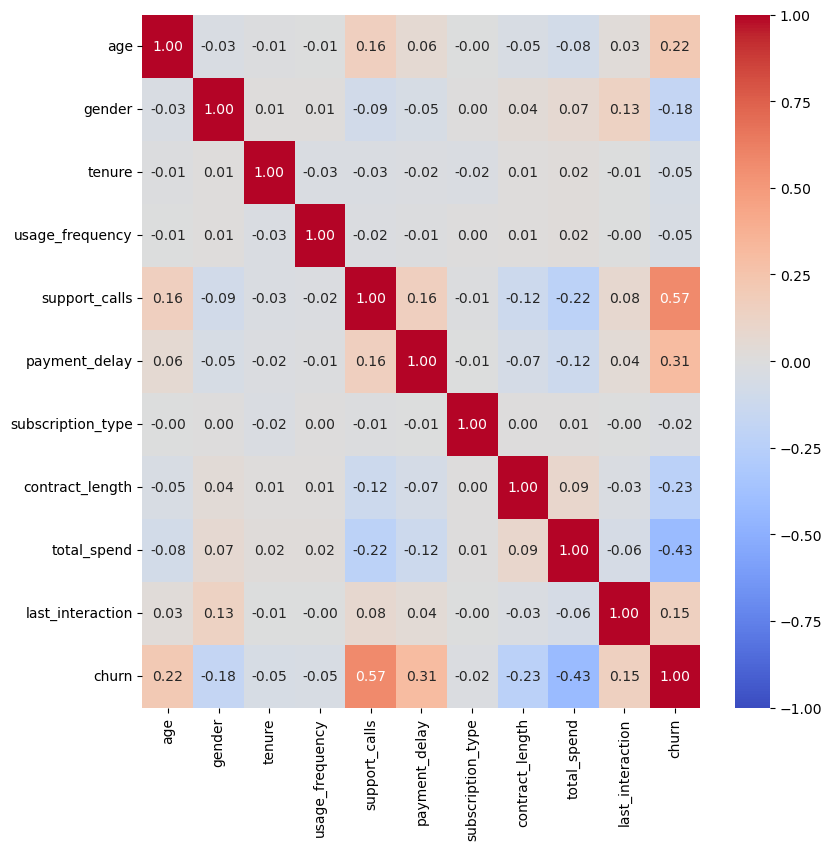

In [10]:
plt.figure(figsize=(9,9))
sns.heatmap(df_train.corr(), vmin=-1, annot=True, cmap='coolwarm', fmt='.2f')

In [13]:
df_train.to_csv('../../data/train/customer_churn_dataset-training-clean.csv', index=False, header=True)
df_test.to_csv('../../data/test/customer_churn_dataset-training-clean.csv', index=False, header=True)